<h1><center>Ανάλυση Συστημάτων Ηλεκτρικής Ενέργειας - Μόνιμη Κατάσταση Λειτουργίας</center></h1>

<h1><center> ΡΟΗ ΦΟΡΤΙΟΥ</center></h1>

<center> <img src="https://i.ibb.co/879pWFg/line-diagram-image.png" alt="line-diagram-image" border="0" /></center>
<h4><center> Σχήμα 1: Σύστημα τεσσάρων ζυγών</center></h4>

Για το σύστημα ηλεκτρικής ενέργειας με την τοπολογία του παραπάνω σχήματος δίνονται τα ακόλουθα δεδομένα:

1. Επαγωγικές αντιδράσεις των γραμμών μεταφοράς: $Z_{AB(1)} =  Z_{AB(2)} = j0,2$ α.μ.,$ Z_{CD} = j0,1$ α.μ.,$ Z_{DA} = Z_{BC} = j0,2$ α.μ.  

2. Στοιχεία ζυγών:

    * A: Τάση ${V_{A} = 1,0}$ α.μ.
    * B: Παραγωγή ${P_{B} = 0,3}$ α.μ.,Tάση $V_{Β} = 1,0$ α.μ
    * C: Φορτίο ${P_{C} = 0,3}$ α.μ.,${Q_{B} = 0,05}$ α.μ.
    * D: Φορτίο ${P_{D} = 0,4}$ α.μ.,$ {Q_{D} = 0,1}$ α.μ.



#### Δεδομένα εισόδου
Παρακάτω δίνονται δύο πίνακες για την εισαγωγή των δεδομένων του συστήματος.
<br>Δεδομένα των ζυγών:
* Η 1η στήλη είναι για την αρίθμηση ζυγών.
* Η 2η για τον χαρακτηρισμό των ζυγών (**0 για τους PQ, 2 για τους PV, 1 για τον ζυγό ταλάντωσης**).
* Η 3η για τις τιμές των τάσεων (α.μ.) κάθε ζυγού (εάν δεν δίνονται χρησιμοποιείται η τιμή $V=1$).
* Η 4η για τις τιμές των γωνιών (σε μοίρες-degree) κάθε ζυγού (εάν δε δίνονται χρησιμοποιείται η τιμή $θ=0$).
* Η 5η στήλη αφορά τη ζήτηση ενεργού ισχύος για ένα ζυγό (ΜW).
* Η 6η τη ζήτηση αέργου ισχύος (MVar).
* Η 7η την παραγόμενη ενεργό ισχύ στον ζυγό που εξετάζεται (MW).
* Η 8η την παραγόμενη άεργο ισχύ (MVar).
* Η 9η στήλη δηλώνει για τις γεννήτριες (ζυγούς) τα ελάχιστα όρια αέργου ισχύος (MVar).
* Η 10η τα μέγιστα όρια αέργου ισχύος αντίστοιχα (MVar).
* Η 11η στήλη χρησιμοποιείται για τα δεδομένα αντιστάθμισης αέργου ισχύος με πυκνωτές, δηλώνοντας την έγχυση αέργου ισχύος στον αντίστοιχο ζυγό (ΜVar).

In [1]:
%        Bus Bus  Voltage Angle   ---Load----  -------Generator-----  Injected
%        No  code Mag.    Degree   MW   Mvar    MW  Mvar  Qmin  Qmax    Mvar
busdata=[1   1    1.00    0.0      0      0      0    0    0      0      0
         2   2    1.05    0.0      0      0     30    0    0    500      0
         3   0    1.00    0.0     30      5      0    0    0    500      0
         4   0    1.00    0.0     40     10      0    0    0      0      0];

Δεδομένα των γραμμών μεταφοράς και μετασχηματιστών:
* Η 1η και 2η στήλη δηλώνουν τις συνδέσεις που υπάρχουν μεταξύ των ζυγών.
* Η 3η στήλη αναφέρεται στην αντίσταση (α.μ.) κάθε γραμμής
* Η 4η στην αντίδραση (α.μ.) κάθε γραμμής
* Η 5η στο ήμισυ της συνολικής εγκάρσιας χωρητικότητάς της (α.μ.), δηλαδη χρησιμοποιείται το ισοδύναμο μοντέλο Π.
* Η 6η στήλη αναφέρεται σε γραμμή με μετασχηματιστές ισχύος που έχουν μεταβολή της σχέσης μετασχηματισμού (συνήθως θεωρούνται ονομαστικές λήψεις με $t=1$).

In [2]:
%                              Line code
%         Bus bus   R      X      1/2 B     = 1 for lines
%         nl  nr   p.u.   p.u.    p.u.      > 1 or < 1 tr. tap at bus nl
linedata=[1   2    0.0    0.1     0.0         1
          1   4    0.0    0.2     0.0         1
          2   3    0.0    0.2     0.0         1
          3   4    0.0    0.1     0.0         1];

>#### Έγχυση πραγματικής και αέργου ισχύος  
><br>Καθορισμός της βάσης ισχύος σε MVA, $S_{base}=100$ 
>```python 
>(basemva = 100)
>```
> Γίνεται το ισοζύγιο ισχύος για κάθε ζυγό $k$ ξεχωριστά και υπολογίζονται οι ανά μονάδα τιμές της έγχυσης ενεργού και αέργου ισχύος από τις σχέσεις:
>$$P_{sp,k} = \frac{P_{G,k} -P_{D,k}}{S_{base}}\quad (4)$$
>$$Q_{sp,k} = \frac{Q_{G,k} -Q_{D,k}}{S_{base}}\quad (5) $$
Οι μιγαδικές ισχείς εκφράζονται ως:
>$$S = P_{sp,k} + jQ_{sp,k}\quad (6)$$

In [3]:
basemva = 100;
Vm=0; delta=0; yload=0; deltad=0;
nbus = length(busdata(:,1));
kb=[];Vm=[]; delta=[]; V=[];
Pg = zeros(nbus,1); Pd = zeros(nbus,1); Qg = zeros(nbus,1); Qd = zeros(nbus,1);
Psp = zeros(nbus,1); Qsp = zeros(nbus,1); Qsh = zeros(nbus,1);
S = zeros(nbus,1);

for k=1:nbus
n=busdata(k,1); kb(n)=busdata(k,2); Vm(n)=busdata(k,3); delta(n)=busdata(k, 4);
Pd(n)=busdata(k,5); Qd(n)=busdata(k,6); Pg(n)=busdata(k,7); Qg(n) = busdata(k,8);
     Psp(n)=(Pg(n)-Pd(n))/basemva; % (4)
     Qsp(n)=(Qg(n)-Qd(n))/basemva; % (5)
     S(n) = Psp(n) + j*Qsp(n);     % (6)
end

Psp
Qsp
S

Psp =

   0.00000
   0.30000
  -0.30000
  -0.40000

Qsp =

   0.00000
   0.00000
  -0.05000
  -0.10000

S =

   0.00000 + 0.00000i
   0.30000 + 0.00000i
  -0.30000 - 0.05000i
  -0.40000 - 0.10000i



>Μετατροπή γωνιών από μοίρες σε ακτίνια:
$$ (rad)= \frac{\pi}{180^\circ}\cdot δ^\circ \quad (7)$$

In [4]:
for n=1:nbus
    delta(n) = pi/180*delta(n); % (7)
end
delta

delta =

   0   0   0   0



### Υπολογισμός του πίνακα αγωγιμοτήτων του συστήματος
* Αρχικά όλες οι σύνθετες αντιστάσεις μετατρέπονται σε σύνθετες αγωγιμότητες από τη σχέση $(9)$:
$${Z_{km} = R_{km} + jX_{km}} \quad (8)$$
$${y_{km} = \frac{1}{Z_{km}}} \quad (9)$$
* και στη συνέχεια υπολογίζονται τα διαγώνια και τα μη διαγώνια στοιχεία του πίνακα αγωγιμοτήτων από τις παρακάάτω σχέσεις.
$$\boxed{
\!\begin{aligned}{Y_{kk}= {y}_{k}+\sum_{m\in A(k)}({y}_{skm}+{y}_{km})\quad (10) \\ Y_{km}=-{y}_{km}\quad (11)}
\end{aligned}
}$$
Ο πίνακας αγωγιμοτήτων έχει μέγεθος $(nxn)$ όπου $n$ ο αριθμός των ζυγών του συστήματος που εξετάζουμε.

Στo παράδειγμα αυτόό ο πίνακας αγωγιμοτήτων έχει μέγεθος $(4x4)$.

$$Y_{bus} = \begin{bmatrix} Y_{11} & Y_{12} & Y_{13} & Y_{14}\\ Y_{21} & Y_{22} & Y_{23} & Y_{24}\\ Y_{31} & Y_{32} & Y_{33} & Y_{34}\\ Y_{41} & Y_{42} & Y_{43} & Y_{44} \end{bmatrix}$$ 

In [5]:
j=sqrt(-1);
nl = linedata(:,1);  %line from bus
nr = linedata(:,2);  %line to bus
R = linedata(:,3);   %line resistance
X = linedata(:,4);   %line reactance
Bc = j*linedata(:,5);  % the admittance of branch to ground
a = linedata(:, 6);  % the tap ratio of transformer
nbr=length(linedata(:,1));   %number of branch
nbus = max(max(nl), max(nr)); %number of bus
G=[];B=[];

%the impedance of line
Z = R + j*X       %(8)
%the admittance of line
y= ones(nbr,1)./Z %(9)

for n = 1:nbr
    Ybus=zeros(nbus,nbus);  % initialize Ybus to zeros
    % formation of the off diagonal elements
    for k=1:nbr
       Ybus(nl(k),nr(k))=Ybus(nl(k),nr(k))-y(k); %(11)
       Ybus(nr(k),nl(k))=Ybus(nl(k),nr(k));
    end
end
% formation of the diagonal elements
for  n=1:nbus
     for k=1:nbr
         if nl(k)==n
         Ybus(n,n) = Ybus(n,n)+y(k); %(10)
         elseif nr(k)==n
         Ybus(n,n) = Ybus(n,n)+y(k); %(10)
         else, end
     end
end

Ybus

Z =

   0.00000 + 0.10000i
   0.00000 + 0.20000i
   0.00000 + 0.20000i
   0.00000 + 0.10000i

y =

    0 - 10i
    0 -  5i
    0 -  5i
    0 - 10i

Ybus =

    0 - 15i    0 + 10i    0 +  0i    0 +  5i
    0 + 10i    0 - 15i    0 +  5i    0 +  0i
    0 +  0i    0 +  5i    0 - 15i    0 + 10i
    0 +  5i    0 +  0i    0 + 10i    0 - 15i



Ο πίνακας αγωγιμοτήτων σε καρτεσιανή μορφή γράφεται:
$$Y_{km}=G_{km} +jB_{km} \quad (12)$$

In [6]:
G = real(Ybus)                % Conductance matrix..
B = imag(Ybus)                % Susceptance matrix..

G =

   0   0   0   0
   0   0   0   0
   0   0   0   0
   0   0   0   0

B =

  -15   10    0    5
   10  -15    5    0
    0    5  -15   10
    5    0   10  -15



### Χαρακτηρισμός ζυγών του συστήματος

#### Τύποι ζυγών ροής φορτίου

| Τύπος ζυγού           | Γνωστές μεταβλητές    | Άγνωστες μεταβλητές |
| --------------------- | --------------------- | ------------------- |
| Ταλάντωσης ή αναφοράς | $V=1$α.μ.,$δ=0^\circ$ | $P_{G}$,$Q_{G}$     |
| Ζυγoί παραγωγής (PV)  | $P_{G}$,${V}$         | $Q_{G}$,$δ$         |
| Ζυγοί φορτίου (PQ)    | $P_{D}$,$Q_{D}$       | $V$, $δ$            |

Στο παράδειγμα είναι:

- **Ζυγός A**: Ζυγός ταλάντωσης (sluck bus). Θεωρούμε ότι η τάση του είναι σταθερή κατά μέτρο και γωνία $V_{1}=1\angle 0^\circ $ α.μ..
- **Ζυγός B**: Ζυγός παραγωγής (PV), αφού είναι γνωστά η παραγόμενη ενεργός ισχύς $P_{B_{G}}=0,3$α.μ. και το μέτρο της τάσης $V_{Β}=1$ α.μ.
- **Ζυγός C**: Ζυγός φορτίου (PQ), αφού είναι γνωστές οι ισχείς φορτίου $P_{C_{D}}=0,3$α.μ., $Q_{C_{D}}=0,05$α.μ.
- **Ζυγός D**: Ζυγός φορτίου (PQ), αφού είναι γνωστές οι ισχείς φορτίου $P_{D_{D}}=0,4$α.μ., $Q_{D_{D}}=0,1$α.μ.

<br>Στο παρακάτω τμήμα κώδικα η μεταβλητή $nPV$ εμφανίζει το πλήθος των ζυγών PV του προβλήματος, ενώ η μεταβλητή $nPQ$ εμφανίζει το πλήθος των ζυγών PQ. Οι συναρτήσεις sl, pv και pq βρίσκουν το ζυγό ταλάντωσης και τους ζυγούς PV και PQ αντίστοιχα.

In [7]:
nPV = 0;
nPQ = 0;

for k = 1:nbus
   if kb(k)==2          % PV bus
        nPV = nPV+1;end
   if kb(k)==0
        nPQ = nPQ+1;end % PQ bus
end
nPV
nPQ

sl = find(kb == 1)   % slack bus
pv = find(kb == 2)   % PV Buses..
pq = find(kb == 0)   % PQ Buses..

nPV =  1
nPQ =  2
sl =  1
pv =  2
pq =

   3   4



### Δεδομένα και ζητούμενα
#### Το διάνυσμα κατάστασης
Θεωρούμε ότι $n$ είναι ο συνολικός αριθμός των ζυγών του συστήματος και $m$ ο αριθμός των ζυγών φορτίου PQ. 
<br>Γενικά για $n$ ζυγούς έχουμε $2n$ αγνώστους. 
<br>Δεδομένου ότι η τάση στο ζυγό ταλάντωσης είναι γνωστή κατά μέτρο και γωνία, ενώ τα μέτρα των τάσεων είναι γνωστά στους ζυγούς παραγωγής, οι μεταβλητές που πρέπει να προσδιοριστούν για να περιγραφεί πλήρως η κατάσταση λειτουργίας του συστήματος είναι οι ακόλουθες:
* οι φασικές γωνίες τάσεων όλων των ζυγών εκτός από το ζυγό ταλάντωσης
* τα μέτρα τάσεων όλων των ζυγών φορτίου.

>Οι μεταβλητές αυτές αποτελούν το διάνυσμα κατάστασης $Χ = \begin{bmatrix} δ_2\\...\\δ_n\\V_{n-m+1}\\ ... \\ V_{n} \end{bmatrix} $ με διάσταση $n-1+m$. 
<br>Άρα για την εύρεση των αγνώστων χρειάζονται $n-1+m$ ανεξάρτητες εξισώσεις.
* $n-1$ εξισώσεις πραγματικής ισχύος (για ζυγούς PV και PQ):
$$\boxed{ΔP_k^{(n)}=P_{sp,k}- V_{k}^{(n)}\cdot \sum_{m\in A(k)}{ V_{m}^{(n)}\cdot[G_{km}\cdot cos(δ_{k}^{(n)} - δ_{m}^{(n)}) + B_{km}\cdot sin( δ_{k}^{(n)} - δ_{m}^{(n)})]}}\quad (13)$$
* $m$ εξισώσεις αέργου ισχύος (για ζυγούς PQ):
$$\boxed{ΔQ_k^{(n)}=Q_{sp,k} - V_{k}^{(n)}\cdot \sum_{m\in A(k)}{ V_{m}^{(n)}\cdot[G_{km}\cdot sin(δ_{k}^{(n)} - δ_{m}^{(n)}) - B_{km}\cdot cos( δ_{k}^{(n)} - δ_{m}^{(n)})]}}\quad (14)$$


Στο παράδειγμα αυτό γνωρίζουμε την τάση του ζυγού A κατά μέτρο και γωνία $V_{A}=1\angle 0^\circ $ α.μ. καθώς και το μέτρο της τάσης του ζυγού B, $V_{B}=1$ α.μ. 
<br>Επομένως οι άγνωστοι του προβλήματος είναι 5, οι γωνίες $δ_B$, $δ_C$, $δ_D$ και η τάσεις $V_C$, $V_D$.
<br>To διάνυσμα κατάστασης λοιπόν έχει τη μορφή  $Χ = \begin{bmatrix} δ_B\\δ_C\\δ_D\\V_C\\V_D \end{bmatrix} $ και για να υπολογιστεί θα χρειαστούν τρεις εξισώσεις πραγματικής ($ΔP_{Α}$, $ΔP_{B}$, $ΔP_{C}$) και δύο εξισώσεις αέργου ισχύος ($ΔQ_{C}$, $ΔQ_{D}$).

#### Επαναληπτική διαδικασία
* Πριν ξεκινήσουν οι επαναλήψεις της μεθόδου Newton-Raphson θεωρείται μια ενιαία τιμή εκκίνησης για τις τάσεις όλων των ζυγών του δικτύου, που δεν έχουν καθορισμένη τιμή, στα $V=1\angle 0^\circ $ α.μ.
* Χρησιμοποιώντας αυτή την αρχική εκτίμηση υπολογίζεται, με τη βοήθεια των εξισώσεων ροής φορτίου μια βελτιωμένη δεύτερη εκτίμηση η οποία χρησιμοποιείται για να βρεθεί μία τρίτη κ.ο.κ.
* Οι επαναλήψεις συνεχίζονται μέχρι οι νέες τιμές των μεταβλητών του συστήματος να διαφέρουν από τις αρχικές πολύ λίγο, δηλαδή όταν ικανοποιούνται τα κριτήρια σύγκλισης. 
$$\boxed{
\!\begin{aligned}{|ΔP_{k}^{(n)}|\leq ε\\ |ΔQ_{k}^{(n)}|\leq ε}
\end{aligned}}\quad (15)$$

<br> Στο πρόγραμμα αυτό το κριτήριο είναι: $$|M^{(n)}|\leq ε \quad (16)$$ 
όπου $M$ το διάνυσμα διαφορών: $$Μ  = \begin{bmatrix} ΔP\\ ΔQ \end{bmatrix}\quad (17)$$ και $ε$ η ακρίβεια των τελικών μεγεθών $$ε= 0.001$$
<br> H επαναληπτική διαδικασία στο πρόγραμμα γίνεται με ένα while loop, το οποίο στην εισοδό του ελέγχει το κριτήριο σύγκλισης της σχέσης $(16)$. <br>Ωστόσο, για να εξηγήσουμε αναλυτικά την 1η επανάληψη, έχουμε χωρίσει τον κώδικα σε τμήματα και έχουμε βάλει τον έλεγχο σε σχόλιο, καθώς για να τρέξει επαναληπτικά πρέπει όλος ο κώδικας που περιέχεται στο while loop να βρίσκεται μέσα στο ίδιο κελί (cell).
<br>Στο παρακάτω κομμάτι κώδικα υπολογίζονται οι επαναληπτικές εξισώσεις ροής φορτίου σε όλους τους ζυγούς του ΣΗΕ.
<br>Από αυτές χρειαζόμαστε τις τρεις εξισώσεις πραγματικής ισχύος ($ΔP_{Α}$, $ΔP_{B}$, $ΔP_{C}$) , που αποθηκεύονται στο διάνυσμα dP και τις δύο εξίσωση αέργου ισχύος ($ΔQ_{C}$, $ΔQ_{D}$), που αποθηκεύονται στο διάνυσμα dQ.
<br>Τα διανύσματα αυτά ενώνονται για να δημιουργηθεί το διάνυσμα διαφορών $Μ$ που έχει ίδιες διαστάσεις με το $Χ$.

In [8]:
Tol = 1;
Iter = 0;
%while (Tol >=0.001)   % Iteration starting.. (16)
Iter = Iter +1;
P = zeros(nbus,1);Q = zeros(nbus,1); % Calculate P and Q

for k = 1:nbus
    for m = 1:nbus
            P(k) = P(k) + Vm(k)*Vm(m)*(G(k,m)*cos(delta(k)-delta(m)) + B(k,m)*sin(delta(k)-delta(m))); % (13)
            Q(k) = Q(k) + Vm(k)*Vm(m)*(G(k,m)*sin(delta(k)-delta(m)) - B(k,m)*cos(delta(k)-delta(m))); % (14)
    end
end

dPa = Psp-P; %(13)
dQa = Qsp-Q; %(14)

k = 1;
dQ = zeros(nPQ,1);
for i = 1:nbus
    if kb(i) == 0
        dQ(k,1) = dQa(i);
        k = k+1;
    end
end

dP = dPa(2:nbus)
dQ

% Mismatch Vector
M = [dP; dQ]   % (17)

dP =

   0.30000
  -0.30000
  -0.40000

dQ =

   0.20000
  -0.10000

M =

   0.30000
  -0.30000
  -0.40000
   0.20000
  -0.10000



### 3. Υπολογισμός Ιακωβιανής μήτρας
H Ιακωβιανή μήτρα έχει τη μορφή $$Jac =\begin{bmatrix}\begin{array}{c|c} H & N\\\hline J & L \end{array}\end{bmatrix}\quad (18)$$ 
* O υποπίνακας $Η$ έχει διαστάσεις $(n-1)x(n-1)$
* Ο υποπίνακας $Ν$ έχει διαστάσεις $(n-1)xm$
* Ο υποπίνακας $J$ έχει διαστάσεις $mx(n-1)$
* O υποπίνακας $L$ έχει διαστάσεις $mxm$

Στο παράδειγμα αυτό o υποπίνακας $Η$ έχει διαστάσεις $(3x3)$, ο $Ν\rightarrow(3x2)$, ο $J\rightarrow(2x3)$ και ο $L\rightarrow(2x2)$
  <br>Επομένως η Ιακωβιανή μήτρα έχει τη μορφή: $$Jac = \begin{bmatrix}\begin{array}{c c c|c c} {H_{22}} & {Η_{23}} & {H_{24}}& {N_{23}} & {N_{24}}\\ {H_{32}} & {H_{33}} & {H_{34}} & {N_{33}} & {N_{34}}\\{H_{42}} & {H_{43}} & {H_{44}} & {N_{43}} & {N_{44}}\\ \hline{J_{32}} & {J_{33}} & {J_{34}} & {L_{33}} & {L_{34}}\\{J_{42}} & {J_{43}} & {J_{44}} & {L_{43}} & {L_{44}}\end{array} \end{bmatrix}$$

In [9]:
clear H N J L
H = zeros(nbus-1,nbus-1);
N = zeros(nbus-1,nPQ);
J = zeros(nPQ,nbus-1);
L = zeros(nPQ,nPQ);

Τα διαγώνια και μη διαγώνια στοιχεία του υποπίνακα $Η$ δίνονται από τις σχέσεις:
<br>
<br>
$$\boxed{
\!\begin{aligned}{
H_{kk} =\frac{\partial ΔP_k}{\partial δ_k} = V_{k}^2\cdot Β_{kk}+Q_{k}\quad (19)\\
όπου\quad Q_{k}=  V_k\cdot \sum_{k \not= m }{ V_m\cdot [G_{km}\cdot sin(δ_{k} - δ_{m}) - B_{km}\cdot cos(δ_{k} - δ_{m})]} \quad (20)\\
H_{km}=\frac{\partial ΔP_k}{\partial δ_m} = - V_k\cdot V_m\cdot [G_{km}\cdot sin(δ_{k} - δ_{m}) - B_{km}\cdot cos(δ_{k} - δ_{m})],   k \not= m\quad (21)}
\end{aligned}
}$$

In [10]:
for i = 1:(nbus-1)
    k = i+1;
    for j = 1:(nbus-1)
        m = j+1;
        if k == m
            for m = 1:nbus
                H(i,j) = H(i,j) + Vm(k)*Vm(m)*(G(k,m)*sin(delta(k)-delta(m)) - B(k,m)*cos(delta(k)-delta(m))); % (20)
            end
            H(i,j) =(Vm(k)^2)*B(k,k)+ H(i,j); % (19)
        else
            H(i,j) = -Vm(k)*Vm(m)*(G(k,m)*sin(delta(k)-delta(m)) - B(k,m)*cos(delta(k)-delta(m))); %(21)
        end
    end
end

H

H =

  -15.75000    5.25000   -0.00000
    5.25000  -15.25000   10.00000
   -0.00000   10.00000  -15.00000



Τα διαγώνια και μη διαγώνια στοιχεία του υποπίνακα $N$ δίνονται από τις σχέσεις:
<br>
<br>
$$\boxed{
\!\begin{aligned}{
N_{kk} = \frac{\partial ΔP_k}{\partial V_k}= - V_k \cdot G_{kk}-\frac{P_{k}}{V_{k}}\quad (22)\\
όπου\quad \frac{P_{k}}{V_{k}} = \sum_{k \not= m }{ V_m\cdot [G_{km}\cdot cos(δ_{k} - δ_{m}) + B_{km}\cdot sin(δ_{k} - δ_{m})]}\quad (23)\\
N_{km}=\frac{\partial ΔP_k}{\partial V_m} = - V_k\cdot [G_{km}\cdot cos(δ_{k} - δ_{m}) + B_{km}\cdot sin(δ_{k} - δ_{m})], k \not= m\quad (24)}
\end{aligned}}$$


In [11]:
for i = 1:(nbus-1)
        k = i+1;
        for j = 1:nPQ
            m = pq(j);
            if k == m
                for m = 1:nbus
                    N(i,j) = N(i,j) + Vm(m)*(G(k,m)*cos(delta(k)-delta(m)) + B(k,m)*sin(delta(k)-delta(m))); % (23)
                end
                N(i,j) =- Vm(k)*G(k,k)- N(i,j); % (22)
            else
                N(i,j) = -Vm(k)*(G(k,m)*cos(delta(k)-delta(m)) + B(k,m)*sin(delta(k)-delta(m))); % (24)
            end
        end
    end
N

N =

  -0  -0
  -0  -0
  -0  -0



Τα διαγώνια και μη διαγώνια στοιχεία του υποπίνακα $J$ δίνονται από τις σχέσεις:
<br>
<br>
$$\boxed{
\!\begin{aligned}{J_{kk}=\frac{\partial ΔQ_k}{\partial δ_k} =  V_k^2\cdot G_{kk} -P_{k} \quad (25)\\
όπου\quad P_{k}=V_k\cdot \sum_{k \not= m}{ V_m\cdot [G_{km}\cdot cos(δ_{k} - δ_{m}) + B_{km}\cdot sin(δ_{k} - δ_{m})]} \quad (26)\\
J_{km}=\frac{\partial ΔQ_k}{\partial δ_m} =  V_k\cdot V_m\cdot [G_{km}\cdot cos(δ_{k} - δ_{m}) - B_{km}\cdot sin(δ_{k} - δ_{m})], k \not= m\quad (27)}
\end{aligned}}$$

In [12]:
for i = 1:nPQ
    k = pq(i);
    for j = 1:(nbus-1)
        m = j+1;
        if k == m
            for m = 1:nbus
                J(i,j) = J(i,j) + Vm(k)*Vm(m)*(G(k,m)*cos(delta(k)-delta(m)) + B(k,m)*sin(delta(k)-delta(m))); %(26)
            end
                J(i,j) =(Vm(k)^2)*G(k,k)-J(i,j); %(25)
            else
                J(i,j) = Vm(k)* Vm(m)*(G(k,m)*cos(delta(k)-delta(m)) + B(k,m)*sin(delta(k)-delta(m))); %(27)
        end
    end
end
J

J =

   0   0   0
   0   0   0



Τα διαγώνια και μη διαγώνια στοιχεία του υποπίνακα $L$ δίνονται από τις σχέσεις:
<br>
<br>
$$\boxed{
\!\begin{aligned}{L_{kk}=\frac{\partial ΔQ_k}{\partial V_m} =  V_k\cdot B_{kk}- \frac{Q_{k}}{V_{k}}\quad (28)\\
όπου\quad \frac{Q_{k}}{V_{k}} = \sum_{k\not=m}{ V_m\cdot [G_{km}\cdot sin(δ_{k} - δ_{m}) - B_{km}\cdot cos(δ_{k} - δ_{m})]}\quad (29)\\
L_{km}=\frac{\partial ΔQ_k}{\partial V_m} = - V_k\cdot [G_{km}\cdot sin(δ_{k} - δ_{m}) - B_{km}\cdot cos(δ_{k} - δ_{m})], k \not= m \quad (30)}
\end{aligned}}$$

In [13]:
for i = 1:nPQ
        k = pq(i);
        for j = 1:nPQ
            m = pq(j);
            if k == m
                for m = 1:nbus
                    L(i,j) = L(i,j) + Vm(m)*(G(k,m)*sin(delta(k)-delta(m)) - B(k,m)*cos(delta(k)-delta(m))); % (29)
                end
                L(i,j) = Vm(k)*B(k,k)-L(i,j); %(28)
            else
                L(i,j) = -Vm(k)*(G(k,m)*sin(delta(k)-delta(m)) - B(k,m)*cos(delta(k)-delta(m))); 
            end
        end
    end
    L

L =

  -14.750   10.000
   10.000  -15.000



Επομένως η Ιακωβιανή μήτρα για την 1η επανάληψη θα είναι:

In [14]:
% Jacobian matrix
 Jac = -[H   N; J   L] % (18)

Jac =

   15.75000   -5.25000    0.00000    0.00000    0.00000
   -5.25000   15.25000  -10.00000    0.00000    0.00000
    0.00000  -10.00000   15.00000    0.00000    0.00000
   -0.00000   -0.00000   -0.00000   14.75000  -10.00000
   -0.00000   -0.00000   -0.00000  -10.00000   15.00000



### 4. Υπολογισμός των νέων τάσεων και γωνιών του συστήματος
Από τη γενική εξίσωση Newton-Raphson υπολογίζεται το διάνυσμα των αγνώστων:
$$ Χ = J^{-1}Μ^{(n)}\quad \Rightarrow \quad \begin{bmatrix} Δδ\\ ΔV \end{bmatrix} = \begin{bmatrix} H & N\\ J & L \end{bmatrix}^{-1}\begin{bmatrix} ΔP\\ ΔQ\end{bmatrix} \quad (31)$$

In [15]:
% Correction Vector
X = inv(Jac)*M     % (31)

dTh = X(1:nbus-1)      % Change in Voltage Angle..
dV = X(nbus:end)       % Change in Voltage Magnitude..

X =

  -0.0037166
  -0.0682927
  -0.0721951
   0.0164948
   0.0043299

dTh =

  -0.0037166
  -0.0682927
  -0.0721951

dV =

   0.0164948
   0.0043299



Οι νέες τιμές υπολογίζονται χρησιμοποιώντας τις τιμές της προηγούμενης επανάληψης:
$$\begin{bmatrix}δ\end{bmatrix}^{(n+1)}=\begin{bmatrix}Δδ\end{bmatrix}+\begin{bmatrix} δ\end{bmatrix}^{(n)}\quad (24)$$
$$\begin{bmatrix}V\end{bmatrix}^{(n+1)}=\begin{bmatrix}ΔV\end{bmatrix}+\begin{bmatrix} V\end{bmatrix}^{(n)}\quad (25)$$

Δηλαδή: $$\begin{bmatrix}0\\δ_B\\ δ_C\\ δ_D \end{bmatrix}^{(1)}=\begin{bmatrix}Δδ\end{bmatrix}+ \begin{bmatrix} 0 \\0\\0\\0 \end{bmatrix} $$
και 
$$\begin{bmatrix}1\\1.05\\ V_C\\ V_D \end{bmatrix}^{(1)}=\begin{bmatrix}ΔV\end{bmatrix}+\begin{bmatrix} 1\\1.05\\1\\1 \end{bmatrix}$$

In [16]:
% Updating State Vectors..
% Voltage Angle..
delta(2:nbus) = dTh + delta(2:nbus)'    % (32)

% Voltage Magnitude..
k = 1;
for i = 2:nbus
    if kb(i) == 0
        Vm(i) = dV(k) + Vm(i);        % (33)
        k = k+1;
        end
    end
Vm

delta =

   0.000000  -0.003717  -0.068293  -0.072195

Vm =

   1.0000   1.0500   1.0165   1.0043



Μετατροπή γωνιών από ακτίνια σε μοίρες:
$$ δ^\circ= \frac{180^\circ}{\pi}\cdot(rad) \quad (34)$$

In [17]:
deltad=180/pi*delta % (34)

deltad =

   0.00000  -0.21295  -3.91288  -4.13648



### 5. Υπολογισμός ισχύων στους ζυγούς 
Οι ισχύς που χρειάζεται να προσδιοριστούν αν πρόκειται:
* Για ζυγό ταλάντωσης, είναι η ενεργός και η άεργος ισχύς του, $P_{G}$,$Q_{G}$  
* Για ζυγο PV, είναι η άεργος ισχύς του, $Q_{G}$
<br>Οι ισχείς αυτές δίνονται από τις σχέσεις:
$$P_G = P_k\cdot S_{base} + P_D \quad (35)$$
$$Q_G = Q_k\cdot S_{base} + Q_D\quad (36)$$
Και οι μιγαδικές ισχείς εκφράζονται ως:
$$S_{k} = P_{k} + jQ_{k}\quad (37)$$

In [18]:
k=0;
for n = 1:nbus
     if kb(n) == 1
     k=k+1;
     S(n)= P(n)+j*Q(n); % (37)
     Pg(n) = P(n)*basemva + Pd(n); % (35)
     Qg(n) = Q(n)*basemva + Qd(n); % (36)
     elseif  kb(n) ==2
     k=k+1;
     S(n)=P(n)+j*Q(n); % (37)
     Qg(n) = Q(n)*basemva + Qd(n); % (36)
  end
yload(n) = (Pd(n)- j*Qd(n))/(basemva*Vm(n)^2);
end
Pg
Qg

Pg =

    0
   30
    0
    0

Qg =

  -50.00000
   78.75000
    0.00000
    0.00000



Στο σημείο αυτό ολοκληρώνεται η 1η επανάληψη της μεθόδου.
<br>Η μεταβλητή $Τol$ παίρνει την τιμή της μέγιστης απόλυτης τιμής του διανύσματος διαφορών $Μ$ ώστε να ελεγχθεί το κριτήριο σύγκλισης στην αρχή του while loop.
<br>Στο παρακάτω κελί, το αρχείο Busout υπολογίζει και εμφανίζει τα τελικά αποτελέσματα της ροής φορτίου και το αρχείο Lineflow υπολογίζει και εμφανίζει τις ροές ισχύος στις γραμμές καθώς και τις αντίστοιχες απώλειες ισχύος (όλα τα μεγέθη σε MW και MVar).

In [19]:
Busout
Lineflow
% Tolerance..
%Tol = max(abs(M));
%end


                   Power Flow Solution by Newton-Raphson Method
                        Maximum Power Mismatch = 1 
                             No. of Iterations = 1 

    Bus  Voltage    Angle       ------Load------        ---Generation---       Injected
    No.  Mag.       Degree        MW       Mvar           MW       Mvar           Mvar 
                                                                                       
    1    1.000       0.00        0.00      0.00          0.00    -50.00           0.00
    2    1.050      -0.21        0.00      0.00         30.00     78.75           0.00
    3    1.016      -3.91       30.00      5.00          0.00      0.00           0.00
    4    1.004      -4.14       40.00     10.00          0.00      0.00           0.00
      
    Total                       70.00     15.00         30.00     28.75           0.00


                           Line Flow and Losses 

     --Line--  Power at bus & line flow    --Line loss--  Transformer
  

Το παρακάτω κελί περιέχει όλο τον κώδικα της ροής φορτίου με τη μέθοδο Νewton-Raphson που περιγράψαμε αναλυτικά παραπάνω, το οποίο τρέχει και εμφανίζει τα αποτελέσματα για τις τρεις πρώτες επαναλήψεις όπου και συγκλίνει. 

In [20]:
% Newton_Raphson iterations
basemva = 100;

%        Bus Bus  Voltage Angle   ---Load----  -------Generator-----  Injected
%        No  code Mag.    Degree   MW   Mvar    MW  Mvar  Qmin  Qmax    Mvar
busdata=[1   1    1.00    0.0      0      0      0    0    0      0      0
         2   2    1.05    0.0      0      0     30    0    0    500      0
         3   0    1.00    0.0     30      5      0    0    0    500      0
         4   0    1.00    0.0     40     10      0    0    0      0      0];

%                              Line code
%         Bus bus   R      X      1/2 B     = 1 for lines
%         nl  nr   p.u.   p.u.    p.u.      > 1 or < 1 tr. tap at bus nl
linedata=[1   2    0.0    0.1     0.0         1
          1   4    0.0    0.2     0.0         1
          2   3    0.0    0.2     0.0         1
          3   4    0.0    0.1     0.0         1];

Vm=0; delta=0; yload=0; deltad=0;
nbus = length(busdata(:,1));
kb=[];Vm=[]; delta=[]; V=[];
Pg = zeros(nbus,1); Pd = zeros(nbus,1); Qg = zeros(nbus,1); Qd = zeros(nbus,1);
Psp = zeros(nbus,1); Qsp = zeros(nbus,1); Qsh = zeros(nbus,1);
S = zeros(nbus,1);

for k=1:nbus
n=busdata(k,1); kb(n)=busdata(k,2); Vm(n)=busdata(k,3); delta(n)=busdata(k, 4);
Pd(n)=busdata(k,5); Qd(n)=busdata(k,6); Pg(n)=busdata(k,7); Qg(n) = busdata(k,8);
     delta(n) = pi/180*delta(n);
     Psp(n)=(Pg(n)-Pd(n))/basemva; % (4)
     Qsp(n)=(Qg(n)-Qd(n))/basemva; % (5)
     S(n) = Psp(n) + j*Qsp(n); % (6)
end

nl = linedata(:,1);  %line from bus
nr = linedata(:,2);  %line to bus
R = linedata(:,3);   %line resistance
X = linedata(:,4);   %line reactance
Bc = j*linedata(:,5);
a = linedata(:, 6);
nbr=length(linedata(:,1));   %number of branch
G=[];B=[];

%the impedance of line
Z = R + j*X;  %(10)
%the admittance of line
y= ones(nbr,1)./Z; %(11)

for n = 1:nbr
if a(n) <= 0  a(n) = 1; else end
    Ybus=zeros(nbus,nbus);  % initialize Ybus to zeros
    % formation of the off diagonal elements
    for k=1:nbr
       Ybus(nl(k),nr(k))=Ybus(nl(k),nr(k))-y(k)/(a(k)); %(9)
       Ybus(nr(k),nl(k))=Ybus(nl(k),nr(k));
    end
end
% formation of the diagonal elements
for  n=1:nbus
     for k=1:nbr
         if nl(k)==n
         Ybus(n,n) = Ybus(n,n)+y(k)/(a(k)^2)+ Bc(k); %(8)
         elseif nr(k)==n
         Ybus(n,n) = Ybus(n,n)+y(k)+Bc(k); %(8)
         else, end
     end
end

G = real(Ybus);                % Conductance matrix..
B = imag(Ybus);                % Susceptance matrix..

nPV = 0;
nPQ = 0;

for k = 1:nbus
   if kb(k)==2          % PV bus
        nPV = nPV+1;end
   if kb(k)==0
        nPQ = nPQ+1;end % PQ bus
end

pv = find(kb == 2 | kb == 1);   % PV Buses..
pq = find(kb == 0);             % PQ Buses..

Pgbus=[]; Pgit=[];
Qgbus=[]; Qgit=[];

Pgbus= Pg';
Pgit=Pgbus;
Qgbus= Qg';
Qgit=Qgbus;

Vbus = []; Vit=[];
Vbus = Vm;
Vit = Vbus;

Tol = 1;
Iter = 0;
while (Tol >=0.001 && Iter<3)   % Iteration starting.. (16)
Iter = Iter +1;
P = zeros(nbus,1);Q = zeros(nbus,1); % Calculate P and Q

for k = 1:nbus
    for m = 1:nbus
            P(k) = P(k) + Vm(k)*Vm(m)*(G(k,m)*cos(delta(k)-delta(m)) + B(k,m)*sin(delta(k)-delta(m))); % (13)
            Q(k) = Q(k) + Vm(k)*Vm(m)*(G(k,m)*sin(delta(k)-delta(m)) - B(k,m)*cos(delta(k)-delta(m))); % (14)
    end
end

dPa = Psp-P; %(13)
dQa = Qsp-Q; %(14)

k = 1;
dQ = zeros(nPQ,1);
for i = 1:nbus
    if kb(i) == 0
        dQ(k,1) = dQa(i);
        k = k+1;
    end
end

dP = dPa(2:nbus);
dQ;

% Mismatch Vector
M = [dP; dQ];   % (17)

clear H N J L
H = zeros(nbus-1,nbus-1);
N = zeros(nbus-1,nPQ);
J = zeros(nPQ,nbus-1);
L = zeros(nPQ,nPQ);

for i = 1:(nbus-1)
    k = i+1;
    for j = 1:(nbus-1)
        m = j+1;
        if k == m
            for m = 1:nbus
                H(i,j) = H(i,j) + Vm(k)*Vm(m)*(G(k,m)*sin(delta(k)-delta(m)) - B(k,m)*cos(delta(k)-delta(m))); % (20)
            end
            H(i,j) =(Vm(k)^2)*B(k,k)+ H(i,j); % (19)
        else
            H(i,j) = -Vm(k)*Vm(m)*(G(k,m)*sin(delta(k)-delta(m)) - B(k,m)*cos(delta(k)-delta(m))); %(21)
        end
    end
end

for i = 1:(nbus-1)
        k = i+1;
        for j = 1:nPQ
            m = pq(j);
            if k == m
                for m = 1:nbus
                    N(i,j) = N(i,j) + Vm(m)*(G(k,m)*cos(delta(k)-delta(m)) + B(k,m)*sin(delta(k)-delta(m))); % (23)
                end
                N(i,j) =- Vm(k)*G(k,k)- N(i,j); % (22)
            else
                N(i,j) = -Vm(k)*(G(k,m)*cos(delta(k)-delta(m)) + B(k,m)*sin(delta(k)-delta(m))); % (24)
            end
        end
    end

    for i = 1:nPQ
    k = pq(i);
    for j = 1:(nbus-1)
        m = j+1;
        if k == m
            for m = 1:nbus
                J(i,j) = J(i,j) + Vm(k)*Vm(m)*(G(k,m)*cos(delta(k)-delta(m)) + B(k,m)*sin(delta(k)-delta(m))); %(26)
            end
                J(i,j) =(Vm(k)^2)*G(k,k)-J(i,j); %(25)
            else
                J(i,j) = Vm(k)* Vm(m)*(G(k,m)*cos(delta(k)-delta(m)) + B(k,m)*sin(delta(k)-delta(m))); %(27)
        end
    end
end

for i = 1:nPQ
        k = pq(i);
        for j = 1:nPQ
            m = pq(j);
            if k == m
                for m = 1:nbus
                    L(i,j) = L(i,j) + Vm(m)*(G(k,m)*sin(delta(k)-delta(m)) - B(k,m)*cos(delta(k)-delta(m))); % (29)
                end
                L(i,j) = Vm(k)*B(k,k)-L(i,j); % (28)
            else
                L(i,j) = -Vm(k)*(G(k,m)*sin(delta(k)-delta(m)) - B(k,m)*cos(delta(k)-delta(m))); % (30)
            end
        end
 end

Jac = -[H   N; J   L]; % Jacobian matrix

  % Correction Vector
X = inv(Jac)*M;     % (31)

dTh = X(1:nbus-1);     % Change in Voltage Angle..
dV = X(nbus:end);       % Change in Voltage Magnitude..

% Updating State Vectors..
% Voltage Angle..
delta(2:nbus) = dTh + delta(2:nbus)';    % (32)

% Voltage Magnitude..
k = 1;
for i = 2:nbus
    if kb(i) == 0
        Vm(i) = dV(k) + Vm(i);        % (33)
        k = k+1;
        end
    end

deltad=180/pi*delta; % (34)

iter =[0:Iter];
Vbus = [Vm; Vit];
Vit = Vbus;


k=0;
for n = 1:nbus
     if kb(n) == 1
     k=k+1;
     S(n)= P(n)+j*Q(n); % (37)
     Pg(n) = P(n)*basemva + Pd(n); % (35)
     Qg(n) = Q(n)*basemva + Qd(n); % (36)
     elseif  kb(n) ==2
     k=k+1;
     S(n)=P(n)+j*Q(n); % (37)
     Qg(n) = Q(n)*basemva + Qd(n); % (36)
  end
yload(n) = (Pd(n)- j*Qd(n))/(basemva*Vm(n)^2);
end

Pgbus = [Pg'; Pgit];
Pgit = Pgbus;

Qgbus = [Qg'; Qgit];
Qgit = Qgbus;

Busout
Lineflow

% Tolerance..
Tol = max(abs(M));
end


                   Power Flow Solution by Newton-Raphson Method
                        Maximum Power Mismatch = 1 
                             No. of Iterations = 1 

    Bus  Voltage    Angle       ------Load------        ---Generation---       Injected
    No.  Mag.       Degree        MW       Mvar           MW       Mvar           Mvar 
                                                                                       
    1    1.000       0.00        0.00      0.00          0.00    -50.00           0.00
    2    1.050      -0.21        0.00      0.00         30.00     78.75           0.00
    3    1.016      -3.91       30.00      5.00          0.00      0.00           0.00
    4    1.004      -4.14       40.00     10.00          0.00      0.00           0.00
      
    Total                       70.00     15.00         30.00     28.75           0.00


                           Line Flow and Losses 

     --Line--  Power at bus & line flow    --Line loss--  Transformer
  

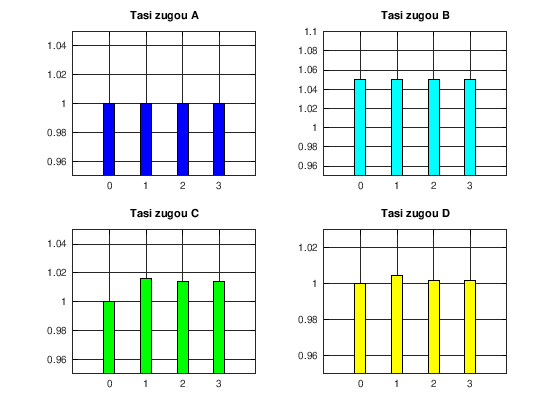

In [21]:
A=flipud(Vbus);
iter;

N = {'A','B','C','D'};
L = {1.05, 1.1, 1.05, 1.03};
C = {'b','c','g','y'}; % Cell array of colors.
for k = 1:4
 subplot(2,2,k);
 bar(iter, A(:,k), 0.3,C{k})
 ylim([0.95 L{k}])
 grid on
 grid minor
 title(['Tasi zugou ',N{k}])
end

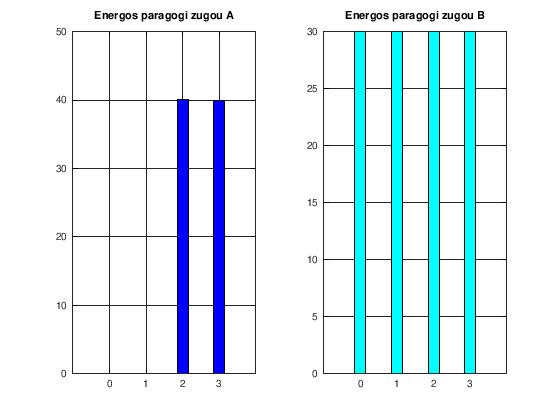

In [22]:
B=flipud(Pgbus);
D=flipud(Qgbus);

N = {'A','B'};
C = {'b','c'};
for k = 1:2
 subplot(1,2,k);
 bar(iter, B(:,k), 0.3,C{k})
 %ylim([25 45])
 grid on
 grid minor
 title(['Energos paragogi zugou ',N{k}])
end

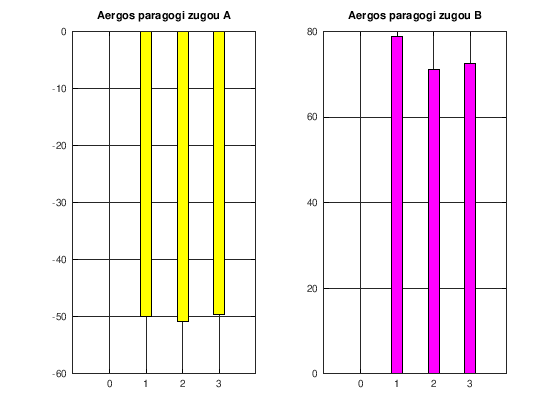

In [23]:
N = {'A','B'};
C = {'y','m'};
for k = 1:2
 subplot(1,2,k);
 bar(iter, D(:,k), 0.3,C{k})
 grid on
 grid minor
 title(['Aergos paragogi zugou ',N{k}])
end